<a href="https://www.kaggle.com/code/thanushreesridhara/exploratory-data-analysis?scriptVersionId=118842836" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv')

Checking first five data using head() and also checking last ten data using tail() 

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [5]:
df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9658,s9659,Movie,12 Dates of Christmas,NaN,NaN,NaN,NaN,2011,PG,87 min,"Drama, Romance","Setup on a Christmas Eve date, a woman must re..."
9659,s9660,Movie,10 Things I Hate About You,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",NaN,NaN,1999,PG-13,97 min,"Comedy, Drama, Romance","On the first day at his new school, Cameron in..."
9660,s9661,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",NaN,NaN,2021,13+,96 min,Comedy,The Man in the Hat journeys through France in ...
9661,s9662,TV Show,Terrahawks,NaN,"DENISE BRYER, WINDSOR DAVIES, JEREMY HITCHEN, ...",NaN,NaN,1983,ALL,3 Seasons,TV Shows,"This thrilling, action-packed series saw Gerry..."
9662,s9663,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",NaN,NaN,2021,16+,93 min,"Drama, Science Fiction, Suspense","River is a grounded Sci-Fi mystery Thriller, t..."
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


info() is used to get the summary of the dataframe 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [7]:
len(df)

9668

In [8]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [9]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,9668,9668,9668,7586,8435,672,155,9331,9668,9668,9668
unique,9668,2,9668,5774,7927,86,84,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,"March 30, 2021",13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,2117,1342,986,15


In [10]:
df.isnull().sum() # checking for total null values

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
df.rename(columns={'listed_in':'Genre'},inplace=True) # renaming the column names for better understanding

In [12]:
df.drop('show_id',inplace=True,axis=1) # dropping the unnecessary column

In [13]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


As observed there are many missing values. We try to fill the missing values using various methods

In [14]:
df['director'] = df['director'].replace(np.nan , "Unavailable")

In [15]:
df['cast'] = df['cast'].replace(np.nan , "Unavailable")

In [16]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

As we can see there are many missing values in country. From the observation we can see most of the movies and tv shows are from Canada,United Kingdom,United States. We can choose either one of them to fill the missing values.

In [17]:
import random
country_names = ['Canada','UnitedStates','UnitedKingdom']
df['country']=df['country'].replace(np.nan,random.choice(country_names))

filling the missing values in date column using forward fill and also changing the datatype of the date column

In [18]:
df['date_added']= df['date_added'].ffill()

In [19]:
df.loc[13:20]

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
13,Movie,Resilencia,Jep Barcelona,"Rafinha Alcantara, Marc-André Ter Stegen, Serg...",Spain,"April 24, 2021",2020,13+,46 min,"Documentary, Sports",The documentary follows the midfielder’s every...
14,Movie,Elon Musk: The Real Life Iron Man,Sonia Anderson,"Elon Musk, Per Wimmer, Julie Anderson-Ankenbra...",United Kingdom,"May 2, 2021",2018,13+,74 min,Documentary,"Discover the meteoric rise of Elon Musk, the m..."
15,Movie,Summer '03,Becca Gleason,"Joey King, Jack Kilmer, Andrea Savage, Paul Sc...",United States,"June 3, 2021",2019,13+,96 min,"Comedy, Drama",Summer '03 is the hilarious story of 16-year-o...
16,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",UnitedStates,"June 3, 2021",2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...
17,TV Show,Zoo Babies,Unavailable,Narrator - Gillian Barlett,UnitedStates,"June 3, 2021",2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...
18,TV Show,Zoë Coombs Marr: Bossy Bottom,Unavailable,Zoë Coombs Marr,UnitedStates,"June 3, 2021",2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...
19,Movie,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",UnitedStates,"June 3, 2021",2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...
20,TV Show,Zoboomafoo,Unavailable,Unavailable,UnitedStates,"June 3, 2021",2001,TV-Y,1 Season,Kids,Chris and Martin Kratt bring their enthusiasm ...


Changing the format of the date type

In [20]:
df['date_added']=pd.to_datetime(df['date_added'])

In [21]:
df.info()  # Here we can observe that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   director      9668 non-null   object        
 3   cast          9668 non-null   object        
 4   country       9668 non-null   object        
 5   date_added    9668 non-null   datetime64[ns]
 6   release_year  9668 non-null   int64         
 7   rating        9668 non-null   object        
 8   duration      9668 non-null   object        
 9   Genre         9668 non-null   object        
 10  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 831.0+ KB


This visualization shows us that in which year most of the movies and series released.

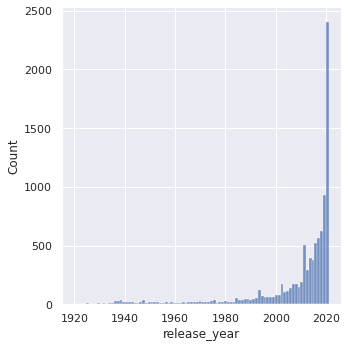

In [22]:
sns.set(style='darkgrid')
sns.displot(data = df ,x="release_year")

<AxesSubplot:xlabel='type', ylabel='count'>

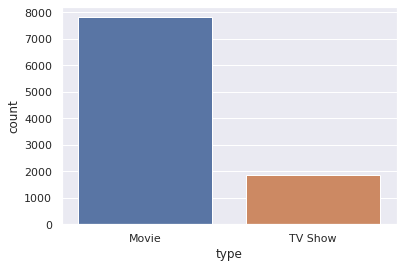

In [23]:
sns.countplot(data=df,x='type') # to know about whether movie is more or TV Show

<AxesSubplot:xlabel='rating', ylabel='count'>

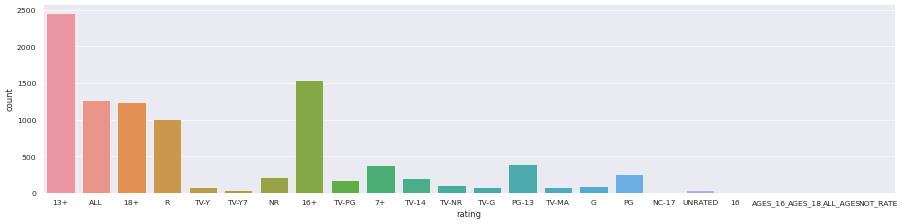

In [24]:
plt.figure(figsize=(22,5),dpi = 50)
sns.countplot(data=df,x='rating') 